[[6.7 9.1]
 [4.6 5.9]
 [3.5 4.6]
 [5.5 6.7]]


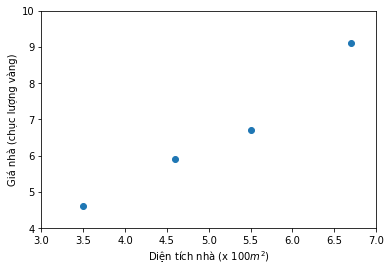

In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
print(data)

plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

In [9]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# load data
data = genfromtxt('data.csv', delimiter=',')

# X_b chứa thêm bias (=1)
m = 4
X = data[:,0]
y = data[:,1]
X_b = np.c_[np.ones((m, 1)), X]

n_epochs = 30
thetas = np.array([[0.04],[-0.34]])

thetas_path = [thetas]
losses = []

for epoch in range(n_epochs):
    for i in range(1):
        # lấy ngẫu nhiên 1 sample [0,m-1]
        random_index = i#np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
                
        # tính output (o = x1*w1 + x2*w2)
        oi = xi.dot(thetas)

        # tính loss li [l = (output - y)^2]
        li = (oi - yi)*(oi - yi)

        # tính gradient cho loss
        g_li = 2*(oi - yi)

        # tính gradient (g_x1 = x1*g_li) va (g_x2 = x2*g_li)
        gradients = xi.T.dot(g_li)
        
        # tính learning rate cho mỗi sample
        eta = 0.01

        # update giá trị theta
        thetas = thetas - eta*gradients

        # logging
        thetas_path.append(thetas)            
        losses.append(li[0][0])

Text(0, 0.5, 'l')

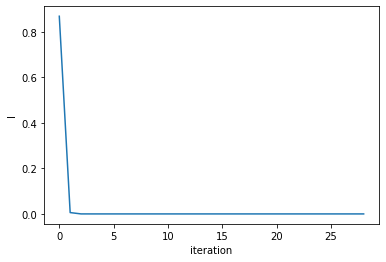

In [10]:
import matplotlib.pyplot as plt

plt.plot(losses[1:])
plt.xlabel('iteration')
plt.ylabel('l')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


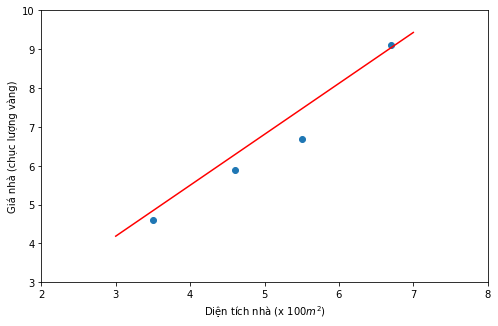

In [9]:
# random space
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
from itertools import cycle
from numpy import genfromtxt


data = genfromtxt('data.csv', delimiter=',')
m = 4
X = data[:,0]
y = data[:,1]
X_b = np.c_[np.ones((m, 1)), X]

eta = 0.01
index = 0
thetas = np.array([[0.04],[-0.34]])

losses = []

def compute_gradient(index):
    global thetas
    global losses
    
    xi = X_b[index:index+1]
    yi = y[index:index+1]
    
    oi = xi.dot(thetas)
    li = (oi - yi)*(oi - yi)
    
    losses.append(li[0][0])
    #print(xi, yi)
    #print('\n loss: ', li)
    
    g_li = 2*(oi - yi)
    gradients = xi.T.dot(g_li)
    
    thetas = thetas - eta*gradients
    
    a = thetas[1][0]
    b = thetas[0][0]
    
    return a,b

def update_plot(i): 
    plt.cla()
    
    global index
    global thetas
    
    index = index+1
    index = index%m
    #print(index)
    
    a,b = compute_gradient(index)
    #print(a,b)
    
    plt.scatter(areas, prices)
    x_value = np.arange(3,8)

    y_value = a*x_value + b 
    plt.plot(x_value, y_value,c='red')

    plt.xlabel('Diện tích nhà (x 100$m^2$)')
    plt.ylabel('Giá nhà (chục lượng vàng)')
    
    plt.xlim(2,8)
    plt.ylim(3,10)

fig, ax = plt.subplots(figsize=(8, 5))
a,b = compute_gradient(index)

plt.scatter(areas, prices)
x_value = np.arange(3,8)

y_value = a*x_value + b 
plt.plot(x_value, y_value,c='red')

plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')

plt.xlim(2,8)
plt.ylim(3,10)

#plt.show()
ani = animation.FuncAnimation(fig, update_plot, interval=2000, frames=range(30), fargs=())    
#HTML(ani.to_html5_video())
ani.save('chap6_data_gif_2.gif', writer='imagemagick', fps=1)

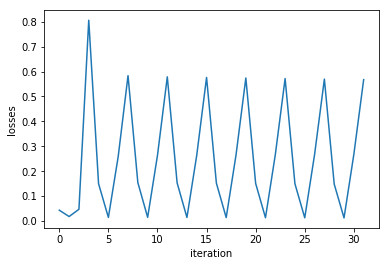

In [53]:
import matplotlib.pyplot as plt

plt.plot(losses[1:])
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()